 # Covid-19

In [408]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\Mayank\Desktop\Mayank\Covid_dataset2020.csv')
df.head()

,unique_id,country,case_in_country,reporting_date,sub_country,gender,age,symptom_onset,visit_date_hosp,intl_traveler,dom_traveler,exposure_startdate,exposure_enddate,visiting_Wuhan,lives_in_Wuhan,death,recovered,symptom
0,1,China,NaN,1/27/2020,Hubei,female,28.0,1/7/2020,1/10/2020,NaN,NaN,NaN,NaN,0.0,1,0.0,1.0,"feaver, cough, difficult in breathing"
1,2,China,NaN,1/27/2020,Hubei,female,51.0,NaN,1/11/2020,NaN,NaN,NaN,NaN,0.0,1,0.0,1.0,"feaver, cough, difficult in breathing"
2,3,China,NaN,1/27/2020,Shandong,male,37.0,NaN,1/17/2020,NaN,NaN,NaN,NaN,0.0,1,0.0,1.0,fever
3,4,Japan,1.0,1/15/2020,Kanagawa,male,35.0,1/3/2020,1/6/2020,NaN,NaN,NaN,1/6/2020,1.0,0,0.0,0.0,fever
4,5,Japan,5.0,1/28/2020,Aichi Prefecture,male,45.0,1/22/2020,1/26/2020,NaN,NaN,NaN,1/20/2020,0.0,1,1.0,0.0,fever


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 18 columns):
unique_id             643 non-null int64
country               643 non-null object
case_in_country       613 non-null float64
reporting_date        642 non-null object
sub_country           580 non-null object
gender                499 non-null object
age                   458 non-null float64
symptom_onset         358 non-null object
visit_date_hosp       288 non-null object
intl_traveler         348 non-null float64
dom_traveler          279 non-null float64
exposure_startdate    42 non-null object
exposure_enddate      162 non-null object
visiting_Wuhan        432 non-null float64
lives_in_Wuhan        440 non-null object
death                 580 non-null float64
recovered             520 non-null float64
symptom               362 non-null object
dtypes: float64(7), int64(1), object(10)
memory usage: 90.5+ KB


In [410]:
df.describe()

,unique_id,case_in_country,age,intl_traveler,dom_traveler,visiting_Wuhan,death,recovered
count,643.000000,613.000000,458.000000,348.0,279.0,432.000000,580.000000,520.000000
mean,322.000000,311.905383,55.262009,1.0,0.0,0.134259,0.282759,0.080769
std,185.762393,435.621768,17.818595,0.0,0.0,0.341326,0.450729,0.272743
min,1.000000,1.000000,4.000000,1.0,0.0,0.000000,0.000000,0.000000
25%,161.500000,37.000000,45.000000,1.0,0.0,0.000000,0.000000,0.000000
50%,322.000000,146.000000,55.000000,1.0,0.0,0.000000,0.000000,0.000000
75%,482.500000,297.000000,66.000000,1.0,0.0,0.000000,1.000000,0.000000
max,643.000000,1765.000000,95.000000,1.0,0.0,1.000000,1.000000,1.000000


In [150]:
print("Total number of rows:",df.shape[0])
print("Total number of columns:",df.shape[1])

Total number of rows: 643
Total number of columns: 18


# Cleaning of Data

In [411]:
df.isnull().sum()

unique_id               0
country                 0
case_in_country        30
reporting_date          1
sub_country            63
gender                144
age                   185
symptom_onset         285
visit_date_hosp       355
intl_traveler         295
dom_traveler          364
exposure_startdate    601
exposure_enddate      481
visiting_Wuhan        211
lives_in_Wuhan        203
death                  63
recovered             123
symptom               281
dtype: int64

In [412]:
df1 = df.drop(['visit_date_hosp','exposure_startdate','exposure_enddate','lives_in_Wuhan'], axis=True)
df1.head()

,unique_id,country,case_in_country,reporting_date,sub_country,gender,age,symptom_onset,intl_traveler,dom_traveler,visiting_Wuhan,death,recovered,symptom
0,1,China,NaN,1/27/2020,Hubei,female,28.0,1/7/2020,NaN,NaN,0.0,0.0,1.0,"feaver, cough, difficult in breathing"
1,2,China,NaN,1/27/2020,Hubei,female,51.0,NaN,NaN,NaN,0.0,0.0,1.0,"feaver, cough, difficult in breathing"
2,3,China,NaN,1/27/2020,Shandong,male,37.0,NaN,NaN,NaN,0.0,0.0,1.0,fever
3,4,Japan,1.0,1/15/2020,Kanagawa,male,35.0,1/3/2020,NaN,NaN,1.0,0.0,0.0,fever
4,5,Japan,5.0,1/28/2020,Aichi Prefecture,male,45.0,1/22/2020,NaN,NaN,0.0,1.0,0.0,fever


In [413]:
df1['age'].mean()

55.262008733624455

In [414]:
df1['case_in_country'] = df['case_in_country'].fillna(0)
df1['reporting_date'] = df['reporting_date'].fillna('1-1-2020')
df1['gender'] = df['gender'].fillna('male')

In [415]:
df1['dom_traveler'] = df['dom_traveler'].fillna(1)
df1['intl_traveler'] = df['intl_traveler'].fillna(0)
df1['sub_country'] = df['sub_country'].fillna('County')

In [416]:
df1['age'] = df['age'].fillna(55)
df1['symptom_onset'] = df['symptom_onset'].fillna('1/1/2020')
df1['death'] = df['death'].fillna(1)

In [417]:
df1['recovered'] = df['recovered'].fillna(1)
df1['symptom'] = df['symptom'].fillna('cough')
df1['visiting_Wuhan'] = df['visiting_Wuhan'].fillna(1)

In [418]:
df1.head(10)

,unique_id,country,case_in_country,reporting_date,sub_country,gender,age,symptom_onset,intl_traveler,dom_traveler,visiting_Wuhan,death,recovered,symptom
0,1,China,0.0,1/27/2020,Hubei,female,28.0,1/7/2020,0.0,1.0,0.0,0.0,1.0,"feaver, cough, difficult in breathing"
1,2,China,0.0,1/27/2020,Hubei,female,51.0,1/1/2020,0.0,1.0,0.0,0.0,1.0,"feaver, cough, difficult in breathing"
2,3,China,0.0,1/27/2020,Shandong,male,37.0,1/1/2020,0.0,1.0,0.0,0.0,1.0,fever
3,4,Japan,1.0,1/15/2020,Kanagawa,male,35.0,1/3/2020,0.0,1.0,1.0,0.0,0.0,fever
4,5,Japan,5.0,1/28/2020,Aichi Prefecture,male,45.0,1/22/2020,0.0,1.0,0.0,1.0,0.0,fever
5,6,Japan,6.0,1/28/2020,Nara Prefecture,male,65.0,1/14/2020,0.0,1.0,0.0,1.0,0.0,"cough, chills, joint pain"
6,7,Japan,7.0,1/28/2020,Hokkaido,female,45.0,1/26/2020,0.0,1.0,1.0,1.0,0.0,"fever, cough"
7,8,Japan,8.0,1/29/2020,Osaka Prefecture,female,45.0,1/20/2020,0.0,1.0,0.0,1.0,0.0,"fever, cough"
8,9,Japan,9.0,1/30/2020,Tokyo,male,55.0,1/29/2020,0.0,1.0,0.0,1.0,0.0,"throat pain, fever"
9,10,Japan,10.0,1/30/2020,Mie,male,55.0,1/25/2020,0.0,1.0,1.0,0.0,0.0,fever


In [419]:
df1.isnull().sum()

unique_id          0
country            0
case_in_country    0
reporting_date     0
sub_country        0
gender             0
age                0
symptom_onset      0
intl_traveler      0
dom_traveler       0
visiting_Wuhan     0
death              0
recovered          0
symptom            0
dtype: int64

# Wrangling of Data

In [422]:
country = df1.country.drop_duplicates()
country

0            China
3            Japan
217       Malaysia
225      Singapore
231    South Korea
244         Taiwan
267       Thailand
274            USA
275        Vietnam
280         Canada
281       Cambodia
282      Sri Lanka
283        Germany
285      Hong Kong
333          Italy
334    Phillipines
335        Finland
336          Spain
337         Sweden
Name: country, dtype: object

In [423]:
group1 = df1.groupby('country')['death'].sum()
group1

country
Cambodia        1.0
Canada          1.0
China          27.0
Finland         1.0
Germany         2.0
Hong Kong      36.0
Italy           1.0
Japan          44.0
Malaysia        4.0
Phillipines     1.0
Singapore       4.0
South Korea     9.0
Spain           1.0
Sri Lanka       1.0
Sweden          1.0
Taiwan         14.0
Thailand        7.0
USA            69.0
Vietnam         3.0
Name: death, dtype: float64

In [424]:
group2 = df1.groupby('country')['recovered'].sum()
group2

country
Cambodia        0.0
Canada          1.0
China          30.0
Finland         0.0
Germany         0.0
Hong Kong       2.0
Italy           0.0
Japan           9.0
Malaysia        6.0
Phillipines     0.0
Singapore       6.0
South Korea     6.0
Spain           0.0
Sri Lanka       1.0
Sweden          0.0
Taiwan          0.0
Thailand        3.0
USA            97.0
Vietnam         4.0
Name: recovered, dtype: float64

In [425]:
group3 = df1.groupby('country')['case_in_country'].sum()
group3

country
Cambodia            1.0
Canada              1.0
China               0.0
Finland             1.0
Germany            22.0
Hong Kong        2140.0
Italy               4.0
Japan           29347.0
Malaysia          116.0
Phillipines         1.0
Singapore         107.0
South Korea       193.0
Spain              11.0
Sri Lanka           1.0
Sweden              1.0
Taiwan            353.0
Thailand           98.0
USA            158758.0
Vietnam            43.0
Name: case_in_country, dtype: float64

In [426]:
group4 = df1.groupby('country')['death','recovered'].sum()
group4

,death,recovered
country,,
Cambodia,1.0,0.0
Canada,1.0,1.0
China,27.0,30.0
Finland,1.0,0.0
Germany,2.0,0.0
Hong Kong,36.0,2.0
Italy,1.0,0.0
Japan,44.0,9.0
Malaysia,4.0,6.0


In [427]:
gender = pd.get_dummies(df1['gender'],drop_first=True)
gender.head()

,male
0,0
1,0
2,1
3,1
4,1


In [428]:
gender = pd.get_dummies(df1['gender'])
gender.head()

,female,male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [429]:
df1 = pd.concat([df1,gender],axis=1)
df1.head()

,unique_id,country,case_in_country,reporting_date,sub_country,gender,age,symptom_onset,intl_traveler,dom_traveler,visiting_Wuhan,death,recovered,symptom,female,male
0,1,China,0.0,1/27/2020,Hubei,female,28.0,1/7/2020,0.0,1.0,0.0,0.0,1.0,"feaver, cough, difficult in breathing",1,0
1,2,China,0.0,1/27/2020,Hubei,female,51.0,1/1/2020,0.0,1.0,0.0,0.0,1.0,"feaver, cough, difficult in breathing",1,0
2,3,China,0.0,1/27/2020,Shandong,male,37.0,1/1/2020,0.0,1.0,0.0,0.0,1.0,fever,0,1
3,4,Japan,1.0,1/15/2020,Kanagawa,male,35.0,1/3/2020,0.0,1.0,1.0,0.0,0.0,fever,0,1
4,5,Japan,5.0,1/28/2020,Aichi Prefecture,male,45.0,1/22/2020,0.0,1.0,0.0,1.0,0.0,fever,0,1


In [430]:
group5 = df1.groupby('country')['death','male','female'].sum()
group5

,death,male,female
country,,,
Cambodia,1.0,1,0
Canada,1.0,1,0
China,27.0,19,11
Finland,1.0,0,1
Germany,2.0,2,0
Hong Kong,36.0,25,23
Italy,1.0,1,0
Japan,44.0,131,83
Malaysia,4.0,3,5


In [431]:
group6 = df1.groupby('country')['recovered','male','female'].sum()
group6

,recovered,male,female
country,,,
Cambodia,0.0,1,0
Canada,1.0,1,0
China,30.0,19,11
Finland,0.0,0,1
Germany,0.0,2,0
Hong Kong,2.0,25,23
Italy,0.0,1,0
Japan,9.0,131,83
Malaysia,6.0,3,5


In [432]:
group7 = df1.groupby('intl_traveler')['case_in_country','country'].sum()
group7.head()

,case_in_country
intl_traveler,
0.0,25610.0
1.0,165588.0


In [433]:
df2 = df1.symptom
df2 = pd.concat([df2,df1.age,df1.male,df1.female,df1.death,df1.recovered,df1.country],axis=1)
df2.head()

,symptom,age,male,female,death,recovered,country
0,"feaver, cough, difficult in breathing",28.0,0,1,0.0,1.0,China
1,"feaver, cough, difficult in breathing",51.0,0,1,0.0,1.0,China
2,fever,37.0,1,0,0.0,1.0,China
3,fever,35.0,1,0,0.0,0.0,Japan
4,fever,45.0,1,0,1.0,0.0,Japan


In [434]:
x = df1.age
def age_buckets(x):
    if x < 20: return '4-19'
    elif x < 30: return '20-29' 
    elif x < 40: return '30-39'
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x >=70: return '70+' 
    else: return 'other'
df2['agerange'] = df2.age.apply(age_buckets)
df2.head()

,symptom,age,male,female,death,recovered,country,agerange
0,"feaver, cough, difficult in breathing",28.0,0,1,0.0,1.0,China,20-29
1,"feaver, cough, difficult in breathing",51.0,0,1,0.0,1.0,China,50-59
2,fever,37.0,1,0,0.0,1.0,China,30-39
3,fever,35.0,1,0,0.0,0.0,Japan,30-39
4,fever,45.0,1,0,1.0,0.0,Japan,40-49


In [524]:
group8 = df2.groupby('agerange')['female','male'].sum()
group8

,female,male
agerange,,
20-29,25,21
30-39,19,22
4-19,3,5
40-49,28,31
50-59,56,222
60-69,45,65
70+,43,58


In [525]:
group9 = df2.groupby('agerange')['death','recovered'].sum()
group9

,death,recovered
agerange,,
20-29,16.0,14.0
30-39,20.0,8.0
4-19,2.0,2.0
40-49,28.0,12.0
50-59,72.0,73.0
60-69,47.0,25.0
70+,42.0,31.0


In [480]:
df3 = df1.symptom
df3 = pd.concat([df3,df1.male],axis=1)
df3.head()

,symptom,male
0,"feaver, cough, difficult in breathing",0
1,"feaver, cough, difficult in breathing",0
2,fever,1
3,fever,1
4,fever,1


In [485]:
v = df3['symptom'].str.strip(', ').str.split(', ')
l = v.str.len()
df3 = pd.DataFrame({'male':np.repeat(df3['male'].values, l), 
                   'symptom':np.concatenate(v.values)})
df3.head()

,male,symptom
0,0,feaver
1,0,cough
2,0,difficult in breathing
3,0,feaver
4,0,cough


In [486]:
df3 = pd.concat([df3,df1.female,df1.death,df1.recovered],axis=1)
df3.head()

,male,symptom,female,death,recovered
0,0,feaver,1.0,0.0,1.0
1,0,cough,1.0,0.0,1.0
2,0,difficult in breathing,0.0,0.0,1.0
3,0,feaver,0.0,0.0,0.0
4,0,cough,0.0,1.0,0.0


In [531]:
group10 = df3.groupby('symptom')['male','female','death','recovered'].sum()
group10.head()

,male,female,death,recovered
symptom,,,,
abdominal pain,1.0,0.0,1.0,0.0
aching muscles,1.0,0.0,0.0,1.0
back pain,0.0,0.0,1.0,0.0
breathlessness,1.0,1.0,0.0,0.0
chest discomfort,1.0,1.0,0.0,1.0


In [488]:
group10.describe()

,male,female,death,recovered
count,68.000000,68.000000,68.000000,68.000000
mean,9.191176,3.220588,3.338235,2.426471
std,40.771755,11.084271,12.514601,8.524445
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.500000,0.000000,0.000000
75%,2.250000,1.250000,1.000000,1.000000
max,292.000000,82.000000,87.000000,58.000000


# Analsying of Data

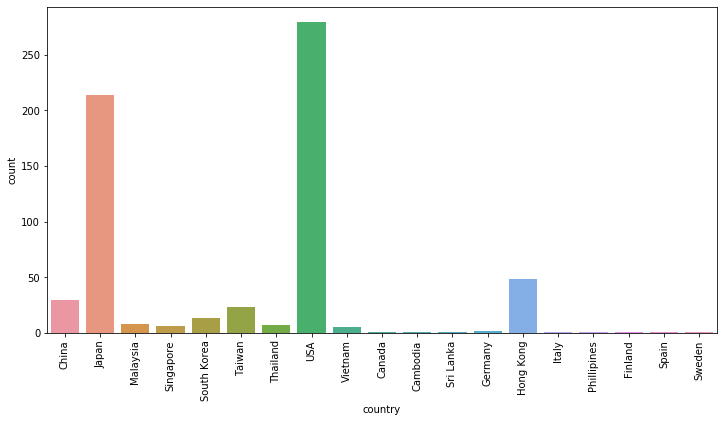

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='country' , data=df1)
plt.xticks(rotation='vertical')
plt.show()

Count of countries mention in the data

In [198]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [199]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
output_notebook()

Loading BokehJS ...

In [321]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
source = ColumnDataSource(group4)
countries = source.data['country'].tolist()
p = figure(x_range=countries)


In [277]:
p = figure(x_range=countries, plot_height=300, title="Death Rates",
           toolbar_location=None, tools="")
p.xaxis.major_label_orientation = "vertical"
p.vbar(x='country', top='death', source=source, width=.9,color='red')


show(p)

In [279]:
p = figure(x_range=countries, plot_height=300, title="Recovered Rates",
           toolbar_location=None, tools="")
p.xaxis.major_label_orientation = "vertical"
p.vbar(x='country', top='recovered', source=source, width=.9,color='green')
show(p)

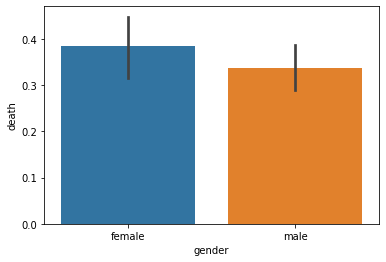

In [289]:
sns.barplot(x='gender',y='death',data=df)

Death Rate according to Gender

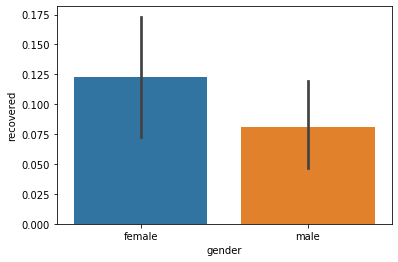

In [290]:
sns.barplot(x='gender',y='recovered',data=df)

Recovered Rate according to Gender

In [519]:
source = ColumnDataSource(group7)
c = source.data['intl_traveler'].tolist()
p = figure(x_range=c)
p = figure(x_range=c, plot_height=350, title="International Travel vs Cases",
           toolbar_location=None, tools="")
p.xaxis.major_label_orientation = "horizontal"
p.vbar(x='intl_traveler', top='case_in_country', source=source, width=.4,color='orange')


show(p)

In [520]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
source = ColumnDataSource(group8)
c = source.data['agerange'].tolist()
p = figure(x_range=sort, plot_height=250, title="Affected Age-Range",
           toolbar_location=None, tools="")

p.vbar_stack(['male', 'female'],  x='agerange', width=0.9, 
                color=['blue', 'orange'],line_color='white',legend=['Male', 'Female'], source=source)

p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [521]:
source = ColumnDataSource(group9)
c = source.data['agerange'].tolist()
p = figure(x_range=c, plot_height=250, title="Death vs Recovered vs Age-Range",
           toolbar_location=None, tools="")

p.vbar_stack(['death', 'recovered'],  x='agerange', width=0.9, 
                color=['green', 'orange'],line_color='white',legend=['Death', 'Recovered'], source=source)

p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [522]:
source = ColumnDataSource(group10)
c = source.data['symptom'].tolist()
p = figure(x_range=c, plot_height=400, title="Symptoms in Male and Female",
           toolbar_location=None, tools="")

p.vbar_stack(['male', 'female'],  x='symptom', width=1.2, 
                color=['green', 'orange'],line_color='white',legend=['Male', 'Female'], source=source)

p.xgrid.grid_line_color = None
p.legend.location = "top_right"
p.xaxis.major_label_orientation = "vertical"

show(p)

In [523]:
source = ColumnDataSource(group10)
c = source.data['symptom'].tolist()
p = figure(x_range=c, plot_height=400, title="Death and Recovered in symptom",
           toolbar_location=None, tools="")

p.vbar_stack(['death', 'recovered'],  x='symptom', width=1.2, 
                color=['red', 'lightgreen'],line_color='white',legend=['Death', 'Recovered'], source=source)

p.xgrid.grid_line_color = None
p.legend.location = "top_right"
p.xaxis.major_label_orientation = "vertical"

show(p)

## Random Forest Regression

In [504]:
group4

,death,recovered
country,,
Cambodia,1.0,0.0
Canada,1.0,1.0
China,27.0,30.0
Finland,1.0,0.0
Germany,2.0,0.0
Hong Kong,36.0,2.0
Italy,1.0,0.0
Japan,44.0,9.0
Malaysia,4.0,6.0


## Training and Testing of Data

In [512]:
b = group4.iloc[:, 1:2].values 

a = group4.iloc[:, 0:1].values 
print (a)

[[ 1.]
 [ 1.]
 [27.]
 [ 1.]
 [ 2.]
 [36.]
 [ 1.]
 [44.]
 [ 4.]
 [ 1.]
 [ 4.]
 [ 9.]
 [ 1.]
 [ 1.]
 [ 1.]
 [14.]
 [ 7.]
 [69.]
 [ 3.]]


In [513]:
b = b.flatten()
print(b)

[ 0.  1. 30.  0.  0.  2.  0.  9.  6.  0.  6.  6.  0.  1.  0.  0.  3. 97.
  4.]


In [514]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

regressor.fit(a, b) 


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [515]:
Y_pred = regressor.predict(np.array([2.3]).reshape(1, 1))
print(Y_pred)

[0.90963869]


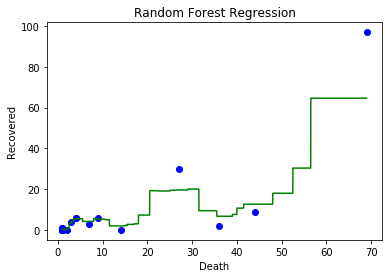

In [518]:
Xgrid = np.arange(min(a), max(a), 0.01) 

Xgrid = Xgrid.reshape((len(Xgrid), 1)) 
 
plt.scatter(a, b, color = 'blue') 
 
plt.plot(Xgrid, regressor.predict(Xgrid),color = 'green') 
plt.title('Random Forest Regression') 
plt.xlabel('Death') 
plt.ylabel('Recovered') 
plt.show()

# After analysing of Covid-19 data

## Some important Outcomes

Q) Which country has most number of cases ?

   USA
   
Q) Which country has most number of Deaths ?

USA

Q) Which country has most number of recovered cases ?

USA

Q) Which gender has most number of death ?

Female

Q) Which gender has most number of recovered cases ?

Female

Q) Main reason for increasing cases in a country (Except China) ?

 International Travellers

Q) Number of cases due to International Travel history ?

 165588
 
Q) Most affected Age Range ?

50-59

Q) Most affected Age Range in gender ?

 MALE - 50-59
 
 FEMALE - 50-59
 
Q) Most number of deaths in Age-range ?

  [50-59] - 72
  
Q) Most number of recovers in Age-range ?

 [50-59] - 73
 
Q) Common symptom found in Male ?

 Cough
 
Q) Common symptom found in Female ?

Fever

Q) Most number of deaths due to symptom ?

Fever - 87

Q) Total number of different symptoms found ?

 68